In [1]:
%config Completer.use_jedi = False
### reload magic
%reload_ext autoreload
%autoreload 2
import numpy as np
import os

from utility import (PlankSolver, 
                     drawer_lamda, drawer_lamda_nu, drawer_approximations, drawer_deviations)
from const import (h, k, c, tera)

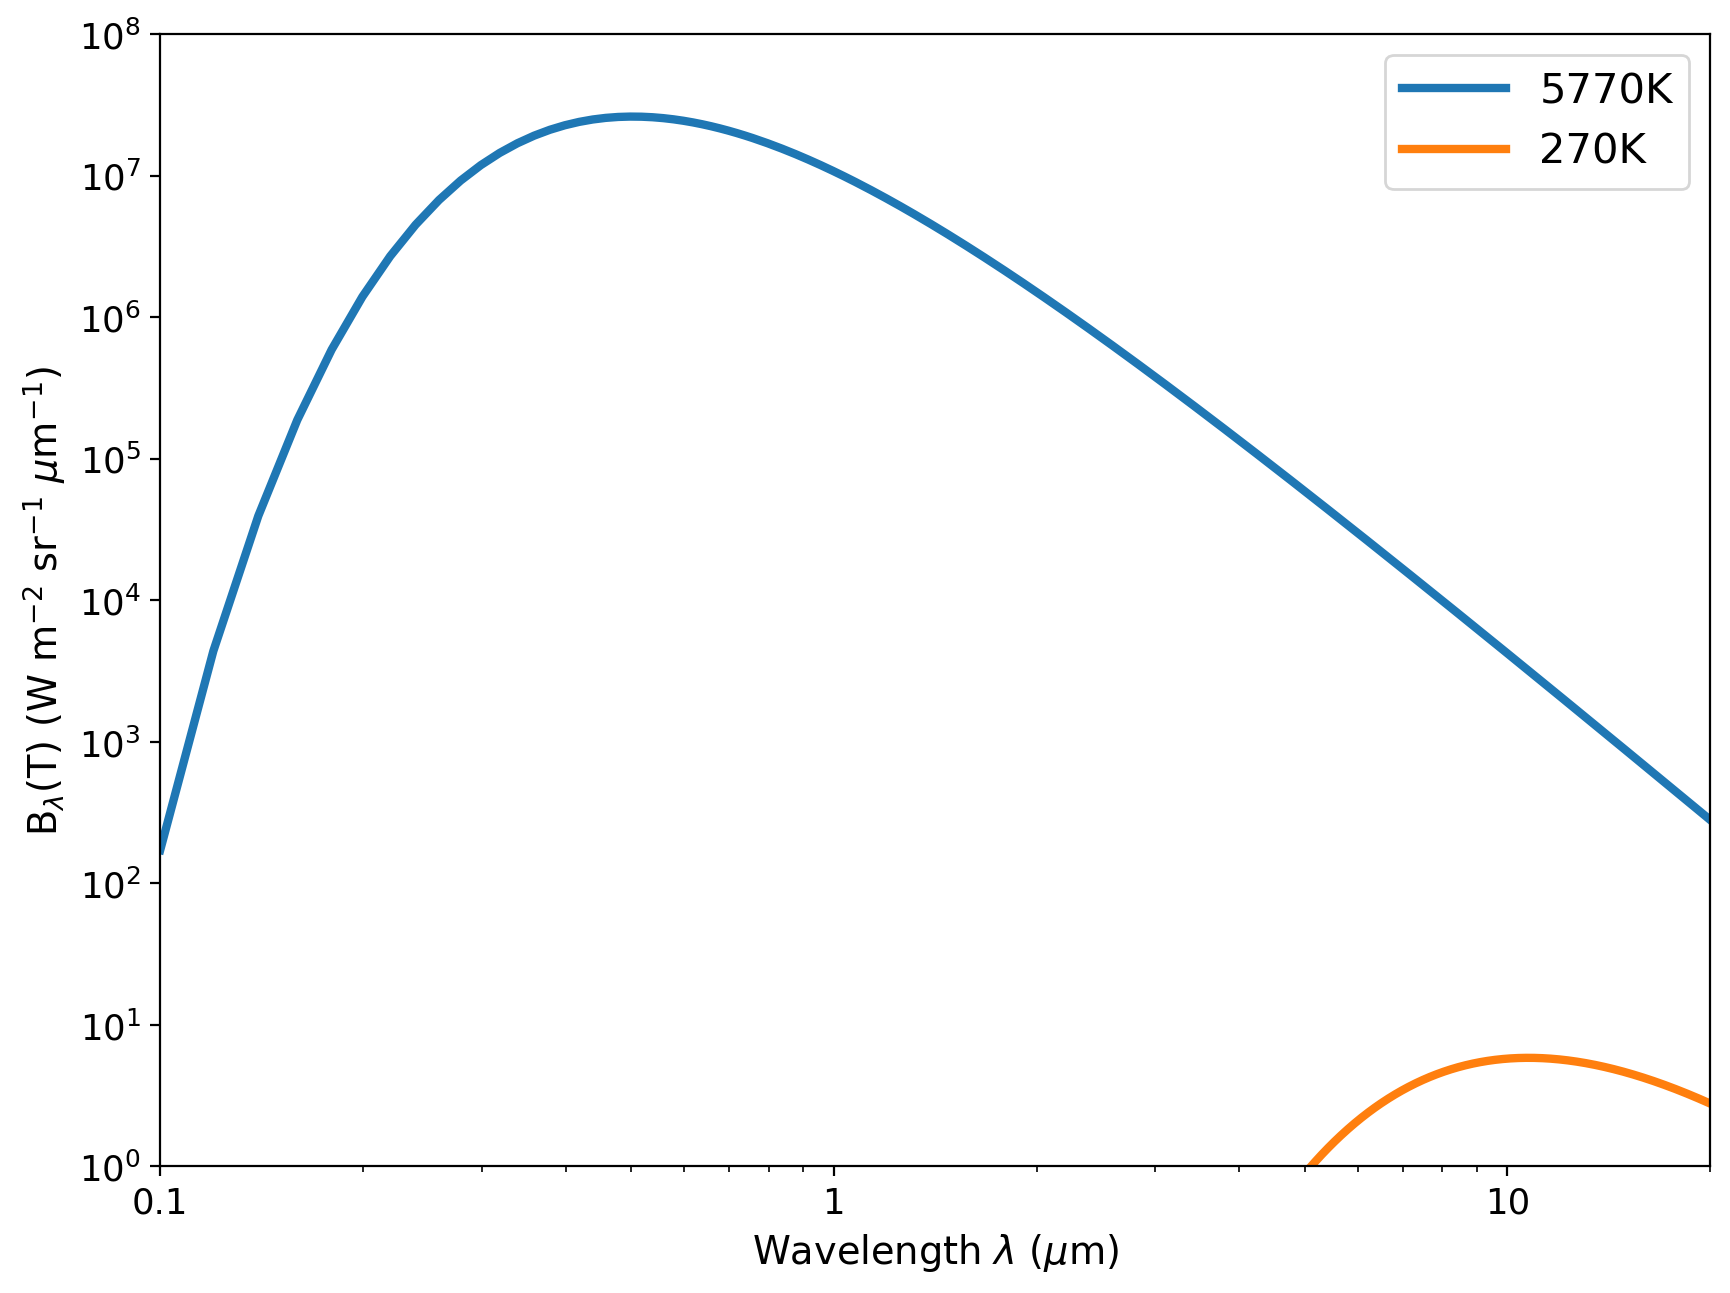

In [2]:
wl_start = 0.1; wl_end = 20 # (μm)
spec_wl  = np.linspace(wl_start, wl_end, 1000)
TS = [5770, 270]
B_lamda = PlankSolver(TS).get_plank_lamda(spec_wl)
drawer_lamda(np.split(B_lamda,2,axis=0), spec_wl, TS)

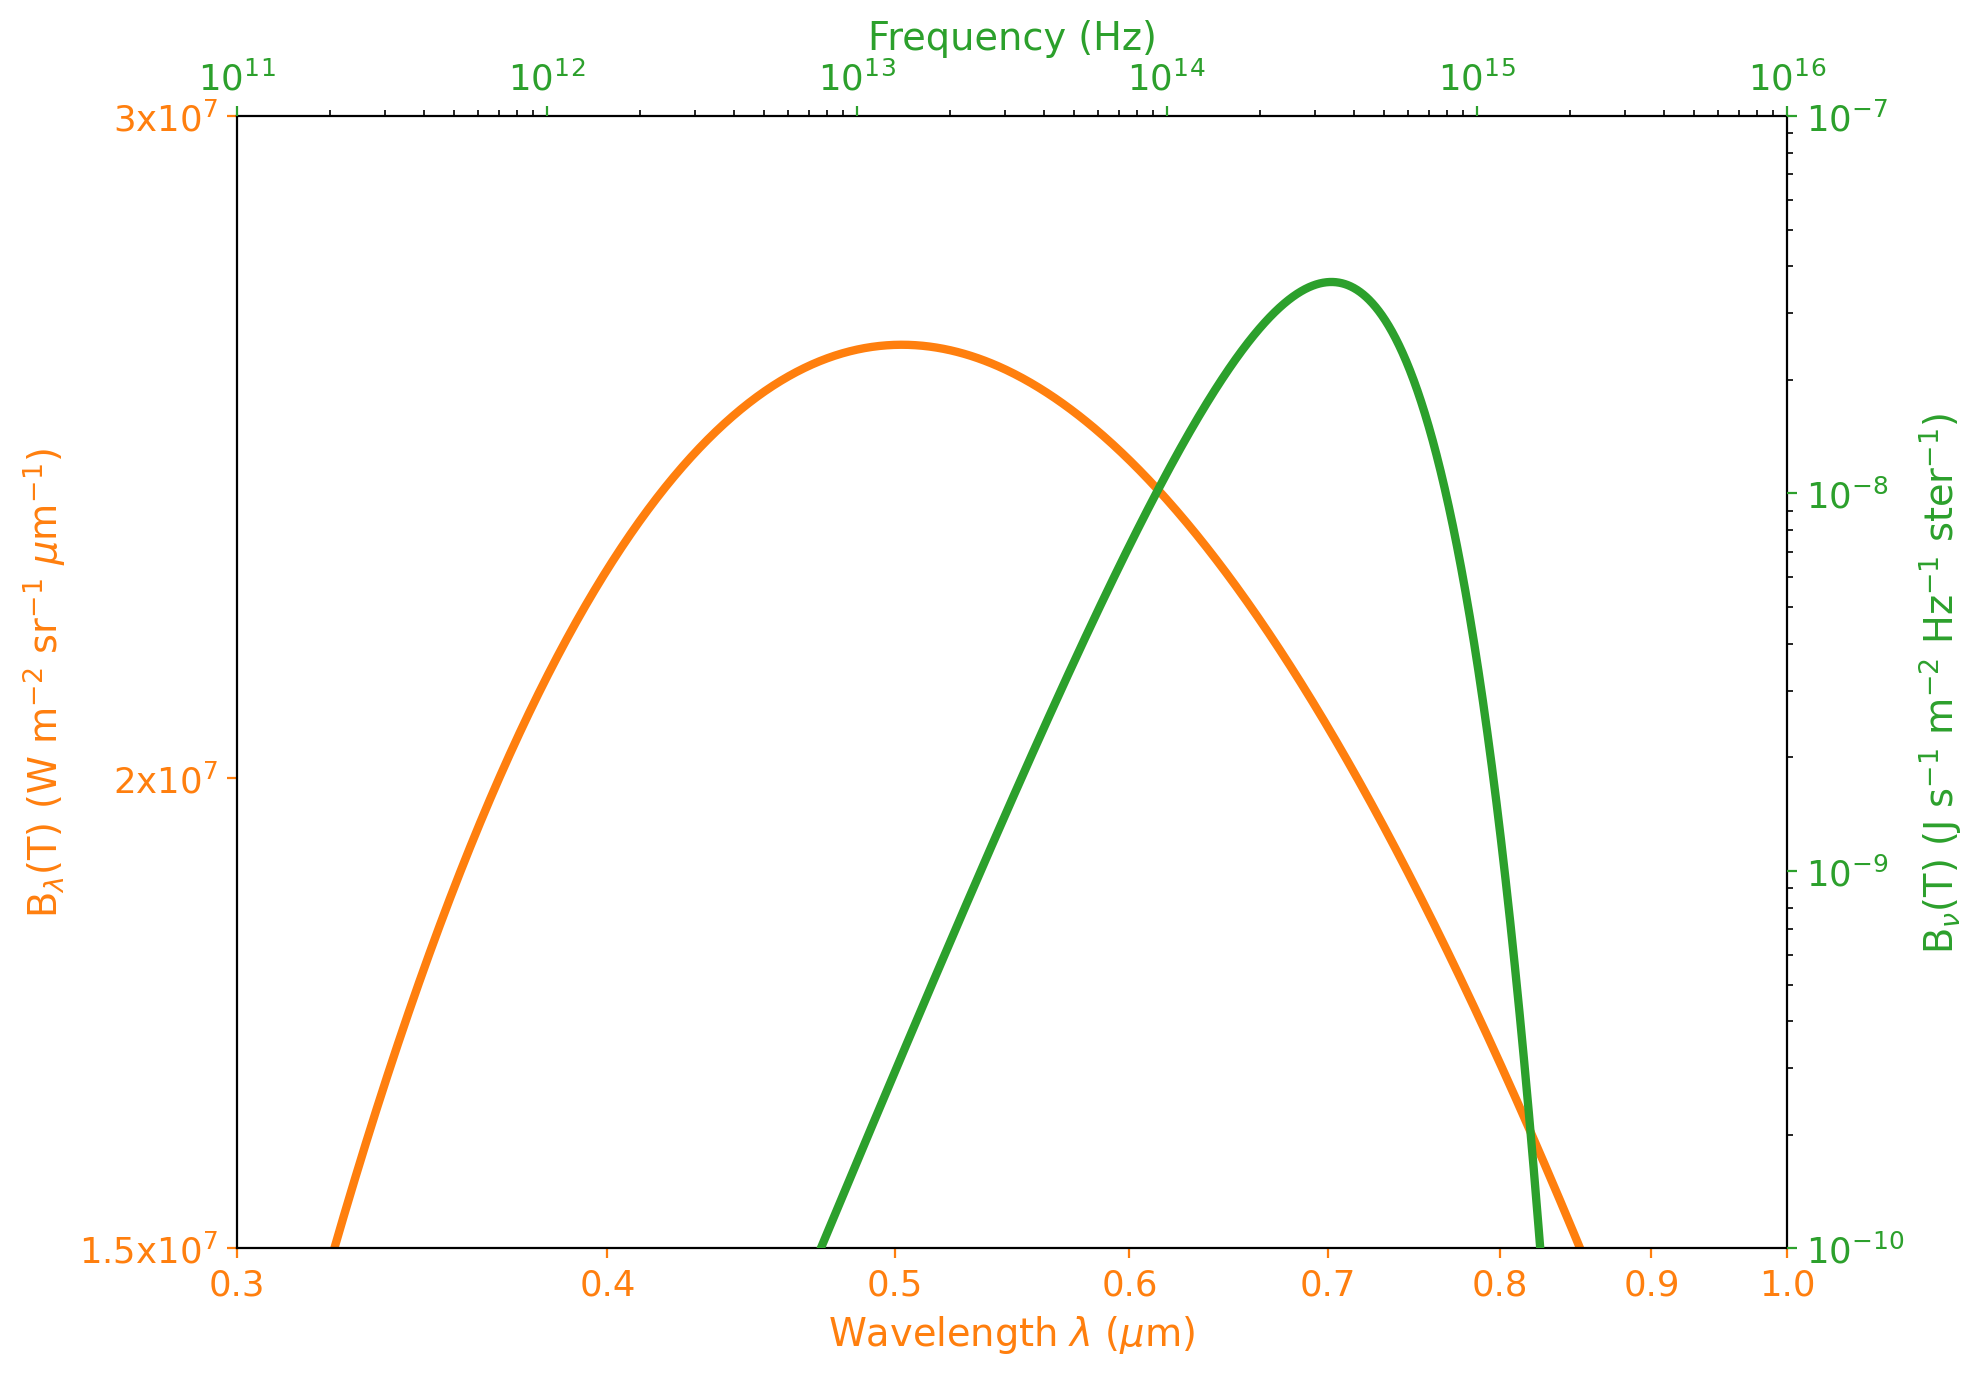

In [3]:
Tb = [5770]

freq_start = 0.001; freq_end = 1600 # (THz)
freqs  = np.linspace(freq_start, freq_end, 1000)
B_nu = PlankSolver(Tb).get_plank_nu(freqs)

wl_start = 0.3; wl_end = 1 # (μm)
spec_wl  = np.linspace(wl_start, wl_end, 1000)
B_lamda = PlankSolver(Tb).get_plank_lamda(spec_wl)

recon_B = {"lamda": B_lamda, "nu": B_nu}
drawer_lamda_nu(spec_wl, freqs*tera, Tb, varns=['lamda','nu'], **recon_B)

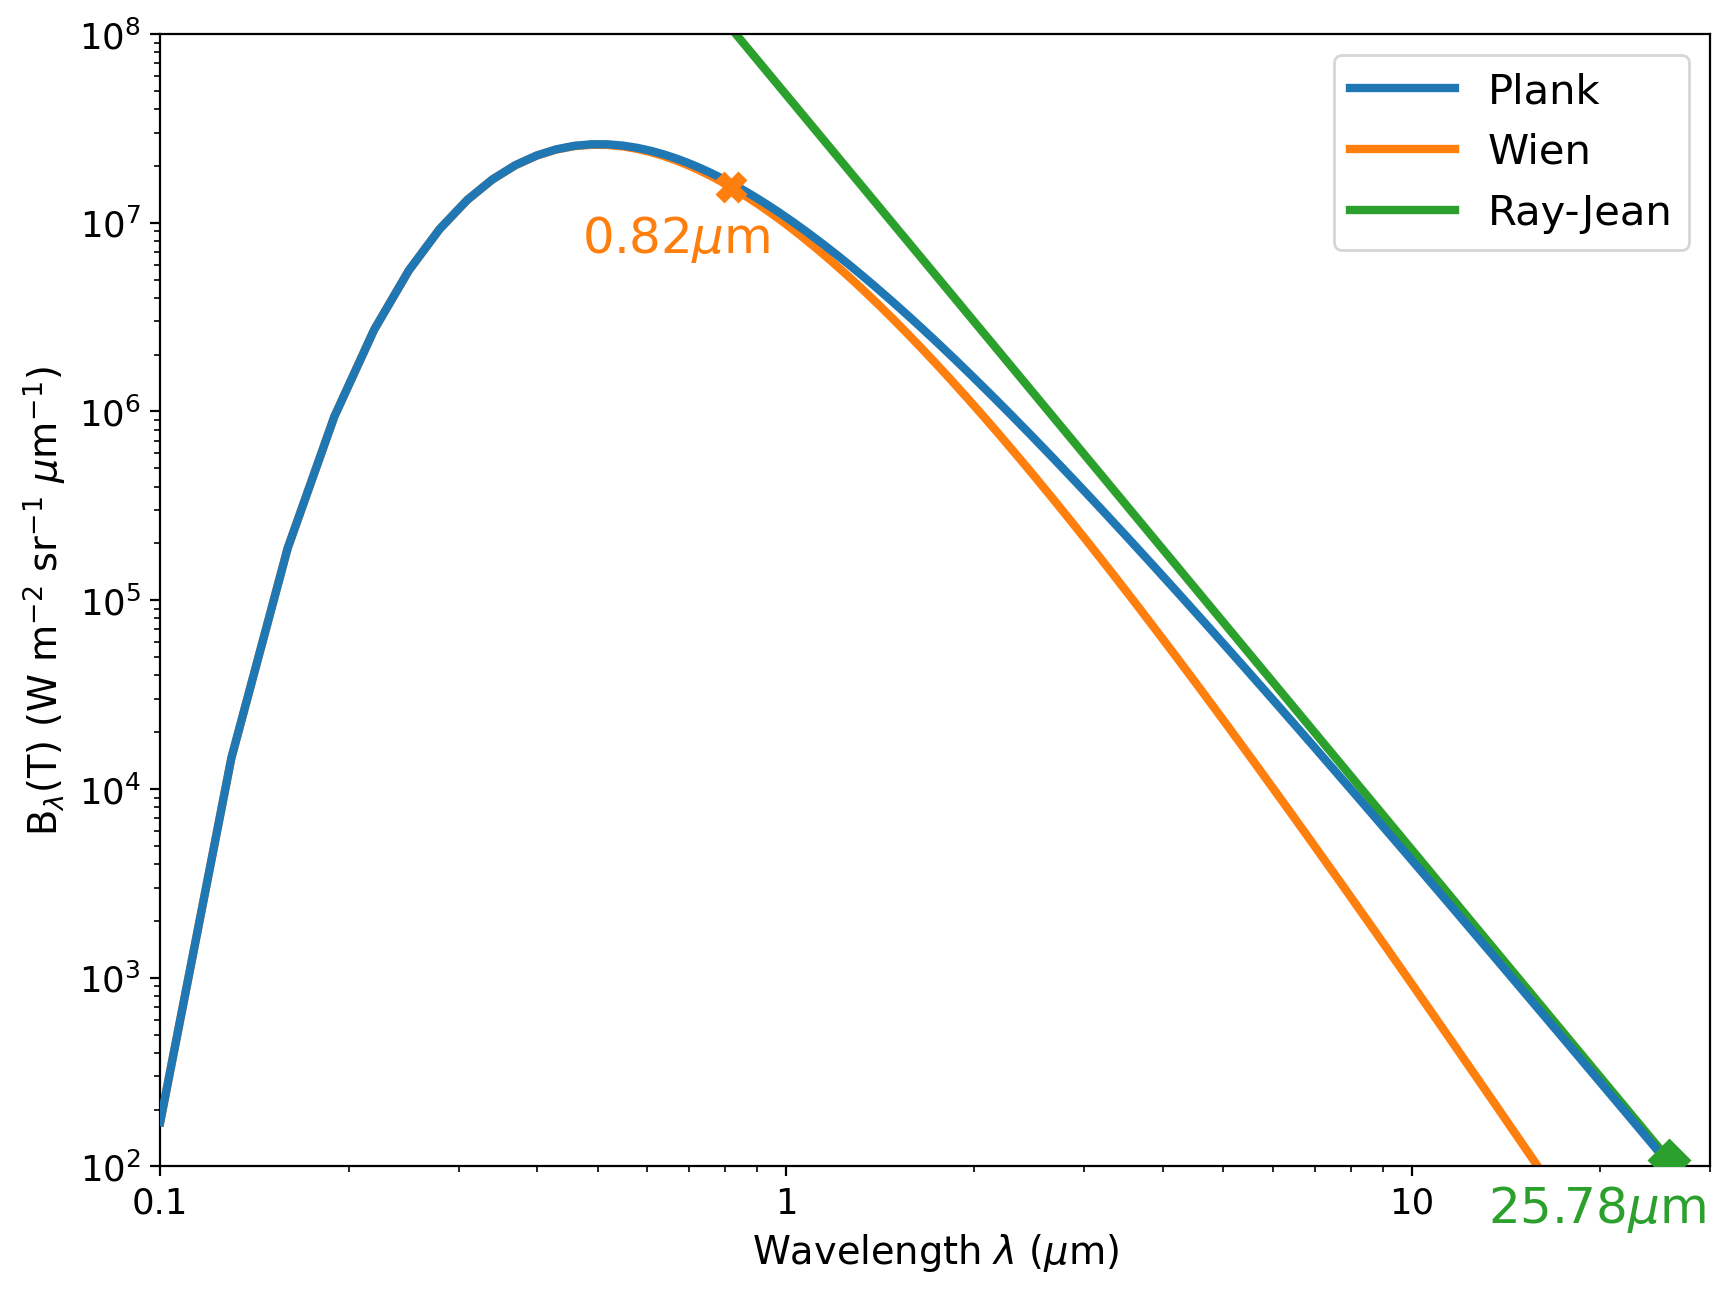

In [4]:
wl_start = 0.1; wl_end = 30 # (μm)
spec_wl  = np.linspace(wl_start, wl_end, 1000)
Tm = [5770]
calculator = PlankSolver(Tm)
B_lamda    = [calculator.get_plank_lamda(spec_wl),
              calculator.get_Wien(spec_wl),
              calculator.get_RayJean(spec_wl)]
methods = ["Plank", "Wien", "Ray-Jean"]
drawer_approximations(B_lamda, spec_wl, *methods)

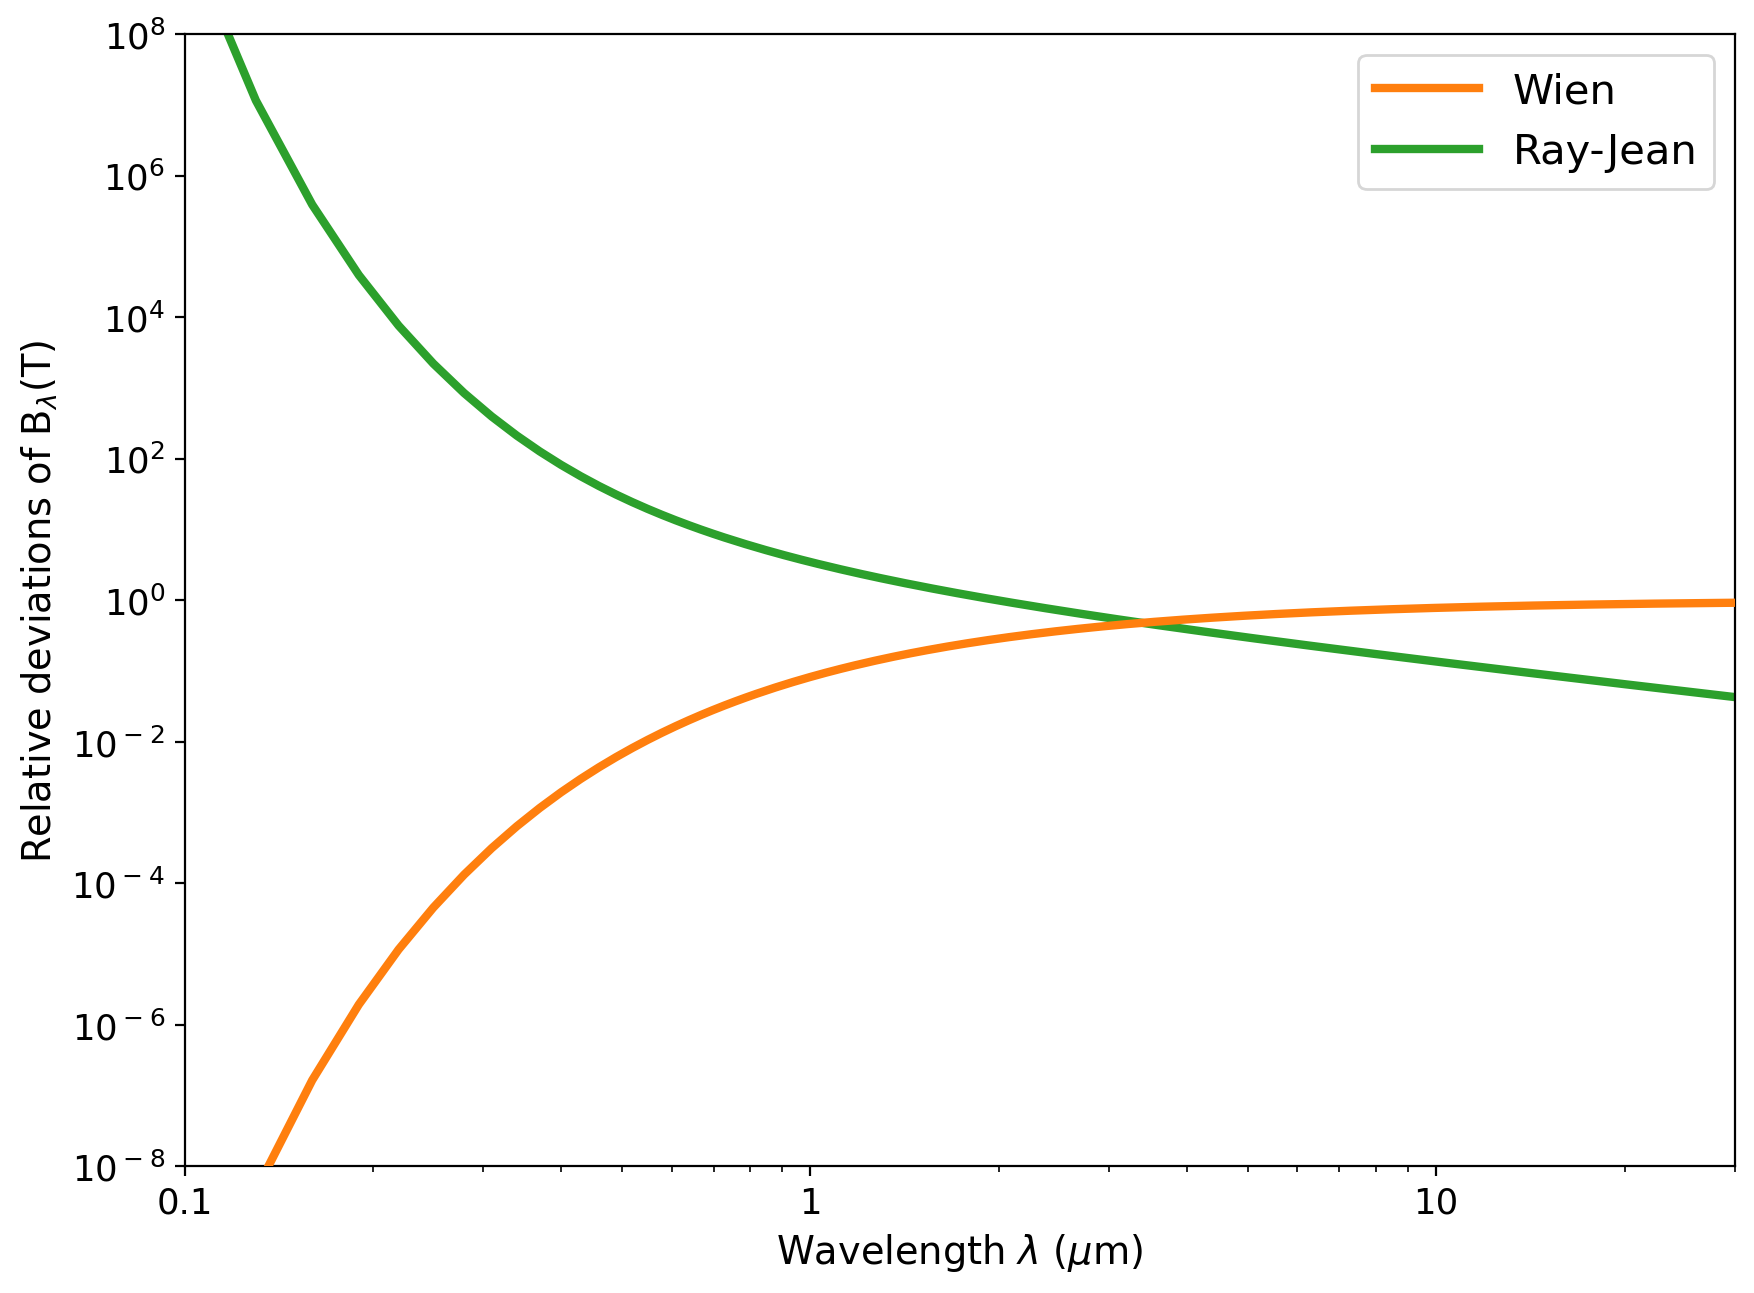

In [5]:
methods = ["Wien", "Ray-Jean"]
drawer_deviations(B_lamda, spec_wl, *methods)